In [1]:
# -*- coding: utf-8 -*-

import datetime as dt
import locale
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates
from matplotlib.dates import WEEKLY,MONTHLY, DateFormatter, rrulewrapper, RRuleLocator 
import numpy as np
 
locale.setlocale(locale.LC_TIME, "pt_BR")

def _create_date(datetxt):
    """Creates the date"""
    day,month,year=datetxt.split('-')
    date = dt.datetime(int(year), int(month), int(day))
    mdate = matplotlib.dates.date2num(date) 
    return mdate
 
def CreateGanttChart(fname):
    """
        Create gantt charts with matplotlib
        Give file name.
    """ 
    ylabels = []
    customDates = []
    try:
        textlist=open(fname, encoding='utf8').readlines()
    except:
        return
#
    for tx in textlist:
        if not tx.startswith('#'):
            ylabel,startdate,enddate=tx.split(',')
            ylabels.append(ylabel.replace('\n',''))
            customDates.append([_create_date(startdate.replace('\n','')),_create_date(enddate.replace('\n',''))])
             
    ilen=len(ylabels)
    pos = np.arange(0.5,ilen*0.5+0.5,0.5)
    task_dates = {}
    for i,task in enumerate(ylabels):
        task_dates[task] = customDates[i]
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    for i in range(len(ylabels)):
         start_date,end_date = task_dates[ylabels[i]]
         ax.barh((i*0.5)+0.5, end_date - start_date, left=start_date, height=0.3, align='center', edgecolor='lightgreen', color='orange', alpha = 0.8)
    locsy, labelsy = plt.yticks(pos,ylabels)
    plt.setp(labelsy, fontsize = 14)
#    ax.axis('tight')
    ax.set_ylim(ymin = -0.1, ymax = ilen*0.5+0.5)
    ax.grid(color = 'g', linestyle = ':')
    ax.xaxis_date()
    rule = rrulewrapper(WEEKLY, interval=1)
    loc = RRuleLocator(rule)
    #formatter = DateFormatter("%d-%b '%y")
    formatter = DateFormatter("%d-%b")
    matplotlib.rc('font', family='Arial')
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    labelsx = ax.get_xticklabels()
    plt.setp(labelsx, rotation=30, fontsize=10)
 
    font = font_manager.FontProperties(size='small')
    ax.legend(loc=1,prop=font)
 
    ax.invert_yaxis()
    fig.autofmt_xdate()
    matplotlib.rc('font', family='Arial')
    plt.tight_layout()
    plt.savefig('gantt_v2.png')
    plt.show()

No handles with labels found to put in legend.


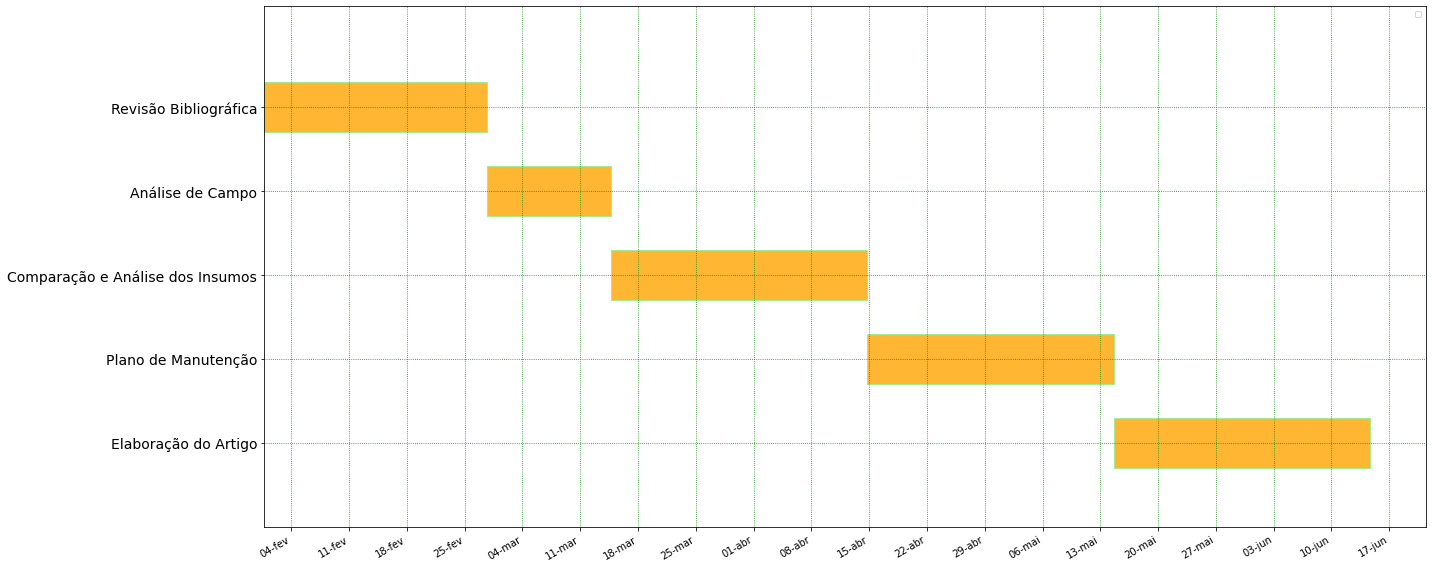

In [2]:
fname=r"gantt.txt"
CreateGanttChart(fname)

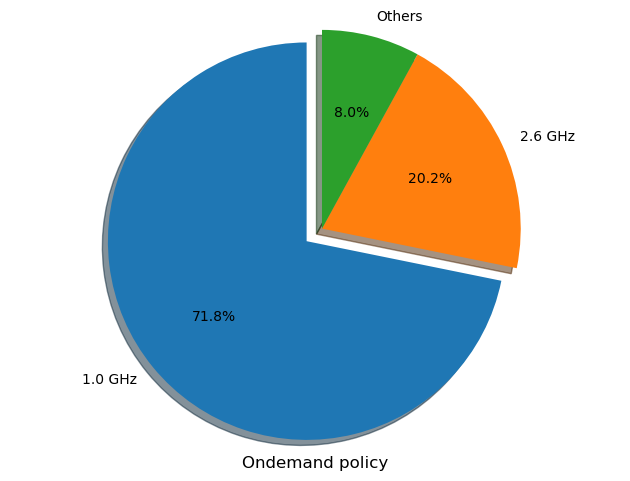

In [45]:
import matplotlib.pyplot as plt
plt.style.use('default')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1.0 GHz', '2.6 GHz', 'Others'
sizes = [71.7, 20.18, 7.97]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Ondemand policy", y=-0.05)
fig.tight_layout()
plt.savefig("ondemand_freqs.png")
plt.show()

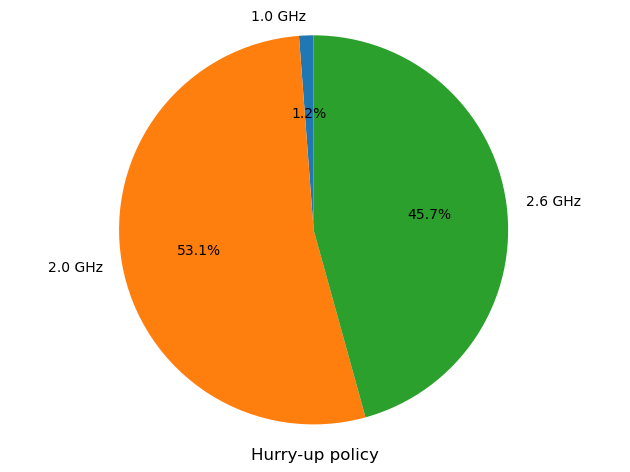

In [46]:
import matplotlib.pyplot as plt
plt.style.use('default')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1.0 GHz', '2.0 GHz', '2.6 GHz'
sizes = [1.2, 53.1, 45.7]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Hurry-up policy", y=-0.05)
fig.tight_layout()
plt.savefig("hup_freqs.png")
plt.show()

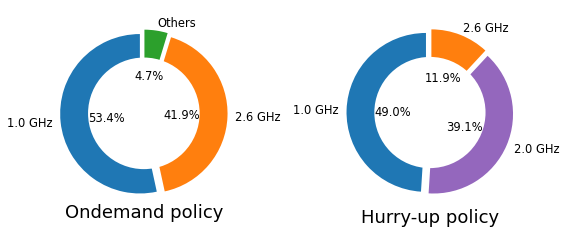

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 11.5

labels = '1.0 GHz', '2.6 GHz', 'Others'
sizes = [ 53.4, 41.9, 4.7 ] # high
#sizes = [71.7, 20.18, 7.97] # mix
colors = ['#1f77b4','#ff7f0e','#2ca02c']#explsion
explode = (0.05,0.05,0.05)

fig1, axs = plt.subplots(1, 2, figsize=(8,3.5))
ax1 = axs[0]
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.42, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gca()
ax1.add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title("Ondemand policy", y=-0.03, fontsize=18)
ax1.axis('equal') 

labels = '1.0 GHz', '2.0 GHz', '2.6 GHz'
#sizes = [45.7, 53.1, 1.2] # mix_final
#sizes = [ 47.8, 47.8, 4.4 ] #high_final
sizes = [ 49.0, 39.1, 11.9 ] #high_init
colors = ['#1f77b4','#9467bd','#ff7f0e']#explsion
explode = (0.05,0.05,0.05)

ax2 = axs[1]
ax2.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.42, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca()
ax2.add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax2.set_title("Hurry-up policy", y=-0.05, fontsize=18)
ax2.axis('equal')  
plt.tight_layout()
plt.savefig('init_hup_ondemand_piechart.png')

plt.show()

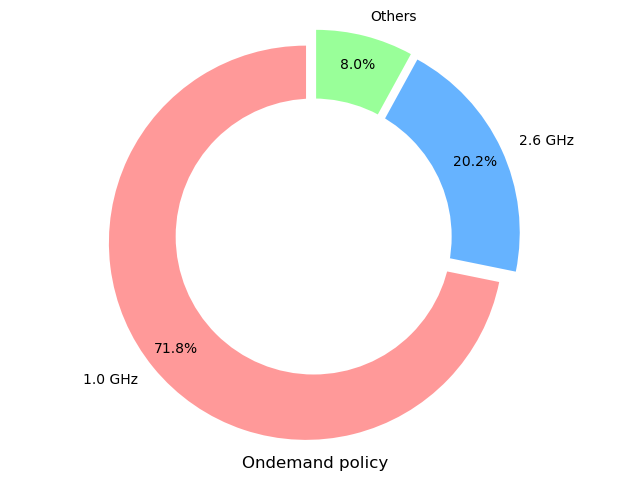

In [58]:
import matplotlib.pyplot as plt
labels = '1.0 GHz', '2.6 GHz', 'Others'
sizes = [71.7, 20.18, 7.97]
colors = ['#ff9999','#66b3ff','#99ff99']#explsion
explode = (0.05,0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Ondemand policy", y=-0.05)
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('ondemand_freq2.png')
plt.show()